Student: Cherepakhin Ivan(309)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

№1

In [2]:
matrix_1 = np.column_stack((np.diag([1,2,3,4]), np.zeros(4)))
np.row_stack((np.zeros(5), matrix_1))

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.]])

№2

In [3]:
x = np.random.random((10, 3))
np.array([x[i] for i in zip(np.arange(0, 10), np.argmin(np.abs(x - 0.5), axis=1))])


array([0.55309498, 0.55481716, 0.48163866, 0.45677135, 0.72250553,
       0.79173719, 0.45732685, 0.4454648 , 0.46058944, 0.33635938])

№3

In [4]:
matrix_3 = np.random.random((6, 6))
np.sum(matrix_3, axis=1) / np.max(matrix_3, axis=1)

array([3.5795567 , 3.17260718, 2.98552282, 4.2578697 , 3.07487707,
       3.18768997])

№4

In [5]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
np.max(x[np.argwhere(x == 0) - 1])

7

№5

In [6]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x[np.column_stack(np.unique(i , return_counts=True))[:,0]] += np.column_stack(np.unique(i , return_counts=True))[:,1]
x
    


array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

№6

In [7]:
x = 5.7
np.floor(x)

5.0

In [8]:
round(x)

6

In [9]:
int(x)

5

№7

In [19]:

class KMeans:
    """
    This class is algorithm KMeans. I try to make all need methods for comfortable using.

    """
  
    def __init__(self, n_classters = 8, theshold = 1, max_iter = 100000, random_state = None):
        self.__n_classters = n_classters
        self.__theshold = theshold
        self.__max_iter = max_iter
        self.__random_state = random_state

        self.cluster_centers_ = 0
        self.labels_ = 0
        self.inertia_ = 0
        self.n_iter_int = 0
        

    def fit(self, sampleX = []):
        """
        Main algorithm
        """
        
        random.seed(self.__random_state)
        
        self.cluster_centers_ = sampleX[random.sample(list(np.arange(sampleX.shape[0])), self.__n_classters)]
        self.labels_ = np.full(sampleX.shape[0], -1, dtype=np.int32)
        vectorDistToCenters = np.full(sampleX.shape[0], -1, dtype=np.double)

        checkAccurancy = 0

        while (np.fabs(checkAccurancy) <= self.__theshold) and (self.n_iter_int <= self.__max_iter):
            prevStandDeviation = np.sum(vectorDistToCenters)
            for i in range(sampleX.shape[0]):
                self.labels_[i] = np.argmin(np.linalg.norm(self.cluster_centers_-sampleX[i], axis=1))
                vectorDistToCenters[i] = np.min(np.linalg.norm(self.cluster_centers_-sampleX[i], axis=1))

            for i in range(self.cluster_centers_.shape[0]):
                sumOfEveryIndexForCenter = np.sum(vectorDistToCenters == vectorDistToCenters[i])
                sumOfEveryPointForCenter = np.sum(sampleX[vectorDistToCenters == vectorDistToCenters[i]], axis=0)
                    
                self.cluster_centers_[i] = sumOfEveryPointForCenter / sumOfEveryIndexForCenter
            
            self.n_iter_int += 1
            checkAccurancy = np.sum(vectorDistToCenters) - prevStandDeviation

        self.inertia_ = np.sum(vectorDistToCenters)

        
        return self.labels_, self.inertia_

    def accuracy_score(self, vectorLabelesFromUser):
        """
        Get accuracy score for your labels
        """
        count = 0
        for i in range(self.labels_.shape[0] - 1):
            if(vectorLabelesFromUser[i] == self.labels_[i]):
                count += 1
        
        return count / len(self.labels_)

        


def plot_scatter(data, labels):
    tableOfData = pd.DataFrame(data)
    grafics = pd.plotting.scatter_matrix(tableOfData, c=labels, figsize=(10,10))

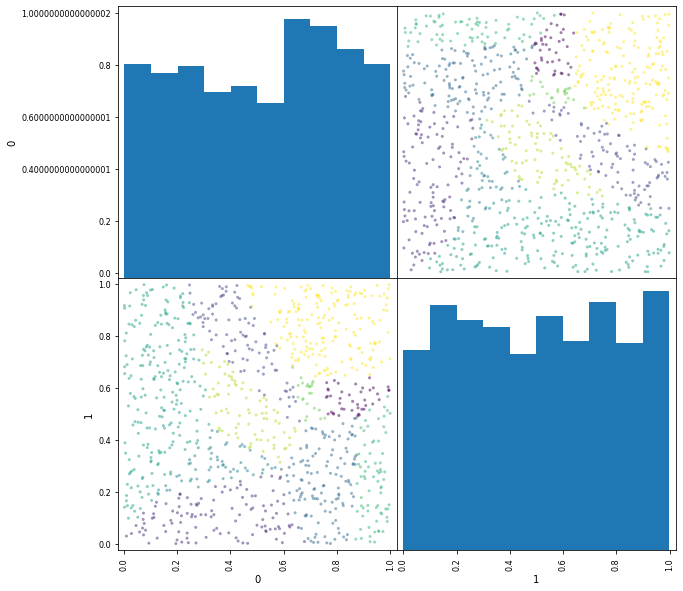

In [11]:
massive = np.random.random((1000,2))
k = 10
max_iter = 100000000
theshold = 1

getIndex, sigma = KMeans(k, theshold, max_iter, random_state=42).fit(massive)

plot_scatter(massive, getIndex)





№8

In [12]:
from sklearn.datasets import fetch_openml

images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)



In [13]:
stopIndex = 10000

In [21]:
k = 10
max_iter = 1000000
theshold = 1
mainObj = KMeans(k, theshold, max_iter, random_state=42)
getIndex, sigma = mainObj.fit(images[:stopIndex])
print(mainObj.accuracy_score(labels[:stopIndex].astype(int)))

0.0603


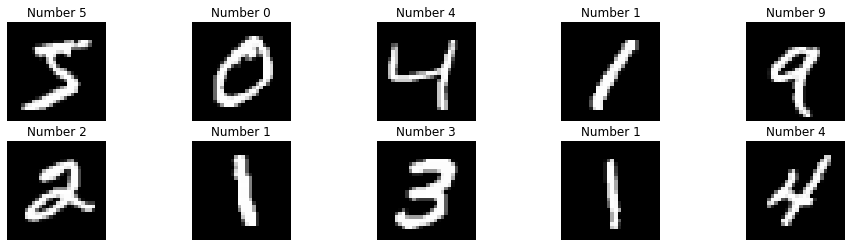

In [15]:
pic_box = plt.figure(figsize=(16, 4))

for i, picture in enumerate(images[list(set(getIndex))]):
    pic_box.add_subplot(2, 5, i+1)
    plt.imshow(picture.reshape(28,28), cmap='Greys_r')
    plt.title('Number ' + labels[i])
    plt.axis('off')

plt.show()



In [24]:
distortions = []
K = np.arange(1, 20)

max_iter = 1000000
theshold = 1
for i in K:
    mainObj = KMeans(i, theshold, max_iter, random_state=41)
    _, _ = mainObj.fit(images[:stopIndex])
    distortions.append(mainObj.accuracy_score(labels[:stopIndex].astype(int)))



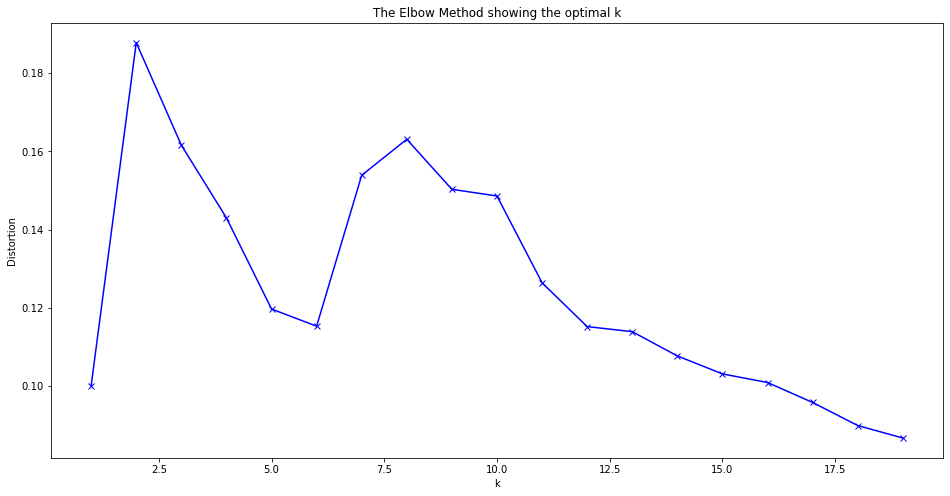

In [25]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
# the biggest accuraancy
minObj = KMeans(np.argmin(distortions), theshold, max_iter, 42)
minObj.fit(images[:stopIndex])





(array([10,  7,  5, ...,  9, 11,  1], dtype=int32), 19594722.94735818)